# <font color = red>**Problem**</font>


__In the telecommunication industry, customers tend to change operators if not provided with attractive schemes and offers. 
It is very important for any telecom operator to prevent the present customers from churning to other operators. As a data scientist, your task in this case study would be to build an ML model which can <font color  = red> predict if the customer will churn or not in a particular month based on the past data.</font>__

____________________________________________________________________________________________________________________________________________

## **Telecom Churn Prediction - Assignment**

The solution is divided into the following sections: 
1. Data Understanding, Preparation, and Pre-Processing
2. Exploratory Data Analysis
3. Feature Engineering and Variable Transformation
4. Model Selection, Model Building, and  Prediction

**Data Understanding, Preparation, and Pre-Processing :** <br>
- Data understanding, identification of potentially useful and non-useful attributes and variable importance and impact estimation
- Data preparation, performing data cleaning, missing values imputation, outlier removal, and column level standardization (for e.g., date, etc.) into one format
 
**Exploratory Data Analysis :** <br>
- Performing basic preliminary data analysis including finding the correlation between variables and scatter plots to identify relationships between variables
- Performing advanced data analysis, including plotting relevant heatmaps, histograms, and basic clustering to find patterns in the data
 
**Feature Engineering and Variable Transformation :** <br>
- Feature engineering and performing one or more methods on attributes that can lead to the creation of a new potentially useful variable; for e.g., day from the date
- Variable transformation and applying categorical variable transformations to turn into numerical data and numerical variable transformations to scale data
 
**Model Selection, Model Building, and  Prediction :** <br>
- Identifying the type of problem and making a list of decisive models from all available choices
- Choosing a training mechanism; for e.g., cross-validation, etc., and tuning hyperparameters of each model
- Testing each model on the respective model evaluation metric
- Choosing the best model based on the fit of the data set and output variable
- Using ensemble options to improve the efficacy based on the evaluation metric stated in the problem

In [388]:
# Imports & options
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # For specifying the axes tick format
import seaborn as sns

pd.set_option('display.max_columns',300)

In [389]:
# Ignoring warning messages
import warnings
warnings.filterwarnings('ignore')

In [390]:
# Reading the telecom churn dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_copy = test

In [391]:
#Let us check if the data is loaded properly
train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [392]:
test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [393]:
#Lets find the total number of rows and columns
train.shape

(69999, 172)

In [394]:
test.shape

(30000, 171)

In [395]:
#store the lengths
train_len = len(train)
test_len = len(test)

In [396]:
#concatenate both dataframes
df = pd.concat([train, test], axis=0)
df.reset_index(drop = True, inplace = True)
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0.0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,

In [397]:
df.shape

(99999, 172)

In [398]:
print(len(train), len(test), len(df))

69999 30000 99999


In [399]:
#input split
train = df.iloc[:train_len,:] # training data
test = df.iloc[train_len:,:] # test data

In [400]:
#Do an info to find the column details
df.info(all, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        99999 non-null  int64  
 1    circle_id                 99999 non-null  int64  
 2    loc_og_t2o_mou            98981 non-null  float64
 3    std_og_t2o_mou            98981 non-null  float64
 4    loc_ic_t2o_mou            98981 non-null  float64
 5    last_date_of_month_6      99999 non-null  object 
 6    last_date_of_month_7      99398 non-null  object 
 7    last_date_of_month_8      98899 non-null  object 
 8    arpu_6                    99999 non-null  float64
 9    arpu_7                    99999 non-null  float64
 10   arpu_8                    99999 non-null  float64
 11   onnet_mou_6               96062 non-null  float64
 12   onnet_mou_7               96140 non-null  float64
 13   onnet_mou_8               94621 non-null  fl

In [402]:
#lets check the proportion of churn_probability
df['churn_probability'].value_counts()
y = df['churn_probability'].value_counts()*100/len(df)
y

0.0    62.867629
1.0     7.132071
Name: churn_probability, dtype: float64

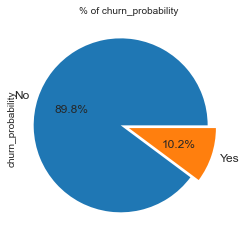

In [403]:
ax = (df['churn_probability'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'], explode = (0.1,0), figsize =(4,4), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('churn_probability',fontsize = 10)
ax.set_title('% of churn_probability', fontsize = 10)
plt.show()

In [404]:
#Let us run a describe on the dataset
df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,99999.000000,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.0,96140.0,94621.0,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.0,96140.0,94621.0,96062.000000,96140.000000,94621.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25153.000000,25571.000000,26339.000000,25153.000000,25571.000000,26339.000000,25153.000000,25571.000000,26339.000000,25153.000000,25571.000000,26339.000000,99999.000000,99999.000000

In [405]:
#Now let us have a look at the column names
pd.DataFrame(df.columns)


,0
0,id
1,circle_id
2,loc_og_t2o_mou
3,std_og_t2o_mou
4,loc_ic_t2o_mou
...,...
167,aon
168,aug_vbc_3g
169,jul_vbc_3g
170,jun_vbc_3g


### Data Cleaning

In [406]:
#First step in data cleaning is to check how much of the data is actually missing

#A function to get the missing value details for each column based on limit set  sourced from stackoverflow
def getmissingvalues(missingcutoff):
    missing = round(100*(df.isnull().sum()/df.shape[0]))
    print("There are {} features having more than {}% missing values/entries".format(len(missing.loc[missing > missingcutoff]),missingcutoff))
    return missing.loc[missing > missingcutoff]

In [407]:
# Missing values per column expressed as % of total number of values
getmissingvalues(60)

There are 30 features having more than 60% missing values/entries


date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
total_rech_data_6           75.0
total_rech_data_7           74.0
total_rech_data_8           74.0
max_rech_data_6             75.0
max_rech_data_7             74.0
max_rech_data_8             74.0
count_rech_2g_6             75.0
count_rech_2g_7             74.0
count_rech_2g_8             74.0
count_rech_3g_6             75.0
count_rech_3g_7             74.0
count_rech_3g_8             74.0
av_rech_amt_data_6          75.0
av_rech_amt_data_7          74.0
av_rech_amt_data_8          74.0
arpu_3g_6                   75.0
arpu_3g_7                   74.0
arpu_3g_8                   74.0
arpu_2g_6                   75.0
arpu_2g_7                   74.0
arpu_2g_8                   74.0
night_pck_user_6            75.0
night_pck_user_7            74.0
night_pck_user_8            74.0
fb_user_6                   75.0
fb_user_7                   74.0
fb_user_8                   74.0
dtype: flo

In [408]:
#As most of the columns are important and that has more na values. Impute those columns values with zero.
#Create a common method to replace the na values in most of the columns as those are having the similar pattern 
#    except the month id's _6, _7, _8

def imputeNan(data,imputeColList=False,missingColList=False):
    # Function impute the nan with 0
    # argument: colList, list of columns for which nan is to be replaced with 0
    if imputeColList:
        for col in [y + s for s in ['_6','_7','_8'] for y in imputeColList]:
            data[col].fillna(0, inplace=True)
    else:    
        for col in missingColList:
            data[col].fillna(0, inplace=True)

In [409]:
imputeCol = ['total_rech_data', 'max_rech_data', 'count_rech_2g', 'count_rech_3g',
             'av_rech_amt_data', 'arpu_3g','arpu_2g','night_pck_user','fb_user']

imputeNan(df,imputeCol)

In [410]:
#Let us now check missing values one more time
getmissingvalues(60)

There are 3 features having more than 60% missing values/entries


date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
dtype: float64

In [411]:
#The dates cannot be really imputed! We will drop them
missingcol = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']
df.drop(missingcol,axis=1,inplace=True)
df.shape

(99999, 169)

In [412]:
# Let us check if  any column is missing data more that 5% ie, 95% data is intact
# Missing values per column expressed as % of total number of values > 5%
getmissingvalues(5)

There are 1 features having more than 5% missing values/entries


churn_probability    30.0
dtype: float64

In [413]:
# As the data are intact with 95%, Let us check how many of them have data missing more than 2%
getmissingvalues(2)

There are 89 features having more than 2% missing values/entries


onnet_mou_6             4.0
onnet_mou_7             4.0
onnet_mou_8             5.0
offnet_mou_6            4.0
offnet_mou_7            4.0
                       ... 
ic_others_6             4.0
ic_others_7             4.0
ic_others_8             5.0
date_of_last_rech_8     4.0
churn_probability      30.0
Length: 89, dtype: float64

In [414]:
missingcol = list(getmissingvalues(2).index)
print ("There are %d customers having missing values for %s together"%(len(df[df[missingcol].isnull().all(axis=1)]),missingcol))
df[df[missingcol].isnull().all(axis=1)][missingcol].head()

There are 89 features having more than 2% missing values/entries
There are 143 customers having missing values for ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'o

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,date_of_last_rech_8,churn_probability
70266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [417]:
df = df.fillna(0)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.00,0.00,0.00,0.00,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.00,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.00,0.00,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.00,0.00,0.00,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.00,0.00,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1958,0.00,0.00,0.00,0.0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.00,0.00,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.00,352.91,0.00,0.00,3.96,0.00,0.00,122.07,0.00,0.0,12

In [319]:
#train treatment = #292 Customers are mssing these columns completely.. Let us drop them
#df=df[~df[missingcol].isnull().all(axis=1)]

In [418]:
#Let us check the shape once again
df.shape

(99999, 169)

In [422]:
#Let us check if there are missing values still at all
getmissingvalues(0)

There are 8 features having more than 0% missing values/entries


loc_og_t2o_mou          1.0
std_og_t2o_mou          1.0
loc_ic_t2o_mou          1.0
last_date_of_month_7    1.0
last_date_of_month_8    1.0
date_of_last_rech_6     2.0
date_of_last_rech_7     2.0
date_of_last_rech_8     4.0
dtype: float64

In [423]:
# Get the unique values in the missing columns
col = list(getmissingvalues(0).index)
for c in col: 
    print("Unique values in column %s are %s" % (c,df[c].unique()))

There are 8 features having more than 0% missing values/entries
Unique values in column loc_og_t2o_mou are [ 0. nan]
Unique values in column std_og_t2o_mou are [ 0. nan]
Unique values in column loc_ic_t2o_mou are [ 0. nan]
Unique values in column last_date_of_month_7 are ['7/31/2014' nan]
Unique values in column last_date_of_month_8 are ['8/31/2014' nan]
Unique values in column date_of_last_rech_6 are ['6/22/2014' '6/12/2014' '6/11/2014' '6/15/2014' '6/25/2014' '6/30/2014'
 '6/29/2014' '6/20/2014' '6/28/2014' '6/27/2014' '6/26/2014' '6/19/2014'
 '6/23/2014' '6/24/2014' '6/14/2014' nan '6/5/2014' '6/8/2014' '6/6/2014'
 '6/16/2014' '6/13/2014' '6/18/2014' '6/21/2014' '6/17/2014' '6/10/2014'
 '6/7/2014' '6/2/2014' '6/1/2014' '6/3/2014' '6/9/2014' '6/4/2014']
Unique values in column date_of_last_rech_7 are ['7/10/2014' '7/22/2014' '7/21/2014' '7/26/2014' '7/27/2014' '7/19/2014'
 '7/30/2014' '7/16/2014' '7/31/2014' '7/20/2014' '7/25/2014' '7/29/2014'
 '7/28/2014' nan '7/7/2014' '7/18/2014' 

In [424]:
#Some of these features take only one value. Lets impute their missing values in these features with the mode
col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_8']
for c in col:
    print(df[c].value_counts())
    df[c].fillna(df[c].mode()[0], inplace=True)
print("All the above features take only one value. Lets impute the missing values in these features with the mode")

0.0    98981
Name: loc_og_t2o_mou, dtype: int64
0.0    98981
Name: std_og_t2o_mou, dtype: int64
0.0    98981
Name: loc_ic_t2o_mou, dtype: int64
8/31/2014    98899
Name: last_date_of_month_8, dtype: int64
All the above features take only one value. Lets impute the missing values in these features with the mode


In [426]:
#Let us now recompute missing values
getmissingvalues(0)

There are 4 features having more than 0% missing values/entries


last_date_of_month_7    1.0
date_of_last_rech_6     2.0
date_of_last_rech_7     2.0
date_of_last_rech_8     4.0
dtype: float64

In [427]:
missingcol = list(getmissingvalues(0).index)
print ("There are %d rows in total having missing values for these variables."%(len(df[df[missingcol].isnull().all(axis=1)])))

There are 4 features having more than 0% missing values/entries
There are 66 rows in total having missing values for these variables.


In [428]:
#Let us impute them with the max date for that month
df[df['date_of_last_rech_6'].isnull()]['date_of_last_rech_6'] = '6/30/2014'
df[df['date_of_last_rech_7'].isnull()]['date_of_last_rech_7'] = '7/31/2014'
df[df['date_of_last_rech_8'].isnull()]['date_of_last_rech_8'] = '8/31/2014'

In [429]:
# Lets check if any of the columns have zero value for all rows - Train Treatment
zero_columns_train=df.columns[(df == 0).all()]
print ("There are {} features which has only 0 as values. These features are \n{}".format(len(zero_columns_train),zero_columns_train))

There are 9 features which has only 0 as values. These features are 
Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')


In [430]:
# we can drop the above columns
df.drop(zero_columns_train,axis=1,inplace=True)

df.shape

(99999, 160)

In [431]:
#Resetting Index
df.reset_index(inplace=True,drop=True)

In [432]:
#Train Treatment
#There are certain columns which are dates but not in pd.datetime datatype. Let us change them
# Converting dtype of date columns to datetime
datecolumns = list(df.filter(regex='date').columns)
for col in datecolumns:
    df[col] = pd.to_datetime(df[col], format='%m/%d/%Y')

In [433]:
#Train Treatment
datecolumns = list(df.filter(regex='date').columns)
print(datecolumns)
df.info()

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 160 entries, id to churn_probability
dtypes: datetime64[ns](6), float64(127), int64(27)
memory usage: 122.1 MB


In [434]:
#Certain Columns do not follow naming convention of _6, _7, _8 - Train
df.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8'}, inplace=True)

In [435]:
#Train Treatment
#Creating new feature: 'vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8'
#This feature will be a cumulative of  2g and 3g
for i in range(6,9):
    df['vol_data_mb_'+str(i)] = (df['vol_2g_mb_'+str(i)]+df['vol_3g_mb_'+str(i)]).astype(int)

In [436]:
#Creating new feature: 'arpu_data_6 ', 'arpu_data_7, 'arpu_data_8
#This feature will be a cumulative of  2g and 3g
for i in range(6,9):
    df['arpu_data_'+str(i)] = (df['arpu_3g_'+str(i)]+df['arpu_3g_'+str(i)]).astype(int)


### Filter high-value customers
Defining high-value customers as follows:
Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [437]:
# Creating new feature in both train and test: avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8
for i in range(6,9):
    df['avg_rech_amt_'+str(i)] = round(df['total_rech_amt_'+str(i)]/df['total_rech_num_'+str(i)]+1,2)

In [438]:
#Creating new feature in both train and test: total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8
for i in range(6,9):
    df['total_rech_num_data_'+str(i)] = (df['count_rech_2g_'+str(i)]+df['count_rech_3g_'+str(i)]).astype(int)

In [439]:
#Creating new feature: total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8
for i in range(6,9):
    df['total_rech_amt_data_'+str(i)] = (df['total_rech_num_data_'+str(i)]*df['av_rech_amt_data_'+str(i)])

In [440]:
#Creating new feature: total_month_rech_6,total_month_rech_7,total_month_rech_8
for i in range(6,9):
    df['total_month_rech_'+str(i)] = df['total_rech_amt_'+str(i)]+df['total_rech_amt_data_'+str(i)]

df.filter(regex=('total_month_rech')).head()

,total_month_rech_6,total_month_rech_7,total_month_rech_8
0,77.0,65.0,10.0
1,0.0,290.0,50.0
2,70.0,120.0,0.0
3,160.0,240.0,130.0
4,1515.0,1473.0,974.0


In [441]:
# calculating the average of first two months (good phase) total monthly recharge amount
avggoodphase =(df.total_month_rech_6 + df.total_month_rech_7)/2
# finding the cutoff which is the 70th percentile of the good phase average recharge amounts
highvaluecutoff= np.percentile(avggoodphase,70)
# Filtering the users whose good phase avg. recharge amount >= to the cutoff of 70th percentile.
highvalue_users = df[avggoodphase >=  highvaluecutoff]
highvalue_users.reset_index(inplace=True,drop=True)

print("Number of High-Value Customers in the Training Dataset: %d\n"% len(highvalue_users))
print("Percentage High-value users in Training data : {}%".format(round(len(highvalue_users)/df.shape[0]*100),2))

Number of High-Value Customers in the Training Dataset: 30001

Percentage High-value users in Training data : 30%


In [442]:
# Train Treatment
#Let us see how many monthly columns are present
# Filtering the common monthly columns for each month
comcol = highvalue_users.filter(regex ='_6').columns
monthlycol = [item.strip('_6') for item in comcol]
print(len(monthlycol))
print(highvalue_users.shape[1])

58
178


In [443]:
# Train Treatment
# list of all the monthly columns 6,7,8
allmonthlycol = [x + s for s in ['_6','_7','_8'] for x in monthlycol]
allmonthlycol

['last_date_of_month_6',
 'arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'date_of_last_rech_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'fb_user_6',
 'vbc_3g_6',
 'vol_data_mb_6',
 'arpu_data

In [444]:
# Train
#Let us check what are the non monthly columns
nonmonthlycol = [col for col in highvalue_users.columns if col not in allmonthlycol]
nonmonthlycol

['id', 'circle_id', 'aon', 'churn_probability']

In [445]:
# Train
# Getting the distinct circle_id's in the Training data
print(highvalue_users.circle_id.unique())

[109]


In [446]:
#All of them are 109 and hence this column can be dropped
highvalue_users.drop('circle_id',axis=1,inplace=True)

In [447]:
#Same column can be dropped from df also 
df.drop('circle_id',axis=1,inplace=True)

In [448]:
#let us check on the Age on Network (aon)
print(highvalue_users.aon.describe())

count    30001.000000
mean      1209.368754
std        957.677989
min        180.000000
25%        460.000000
50%        846.000000
75%       1756.000000
max       4321.000000
Name: aon, dtype: float64


In [449]:
print(df.aon.describe())

count    99999.000000
mean      1219.854749
std        954.733842
min        180.000000
25%        467.000000
50%        863.000000
75%       1807.500000
max       4337.000000
Name: aon, dtype: float64


**Both Train and Test almost same** <br>
Min age on Network = 180 days <br>
Avg Age on the netwoek = 1209 ~(3.3 years)

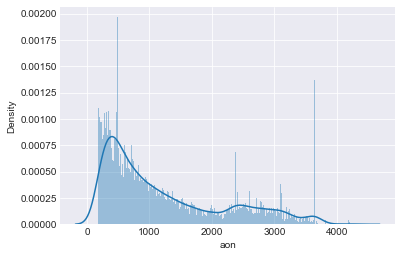

In [450]:
#distplot
sns.distplot(highvalue_users.aon,bins=365)
plt.show()

In [451]:
#Refered from stackoverflow
def plot_avgMonthlyCalls(pltType,data,calltype,colList):
    # style
    plt.style.use('seaborn-darkgrid')
    # create a color palette
    palette = plt.get_cmap('Set1')
    
    if pltType == 'multi':
        #Create dataframe after grouping on AON with colList features
        total_call_mou = pd.DataFrame(data.groupby('aon_bin',as_index=False)[colList].mean())
        total_call_mou['aon_bin']=pd.to_numeric(total_call_mou['aon_bin'])
        total_call_mou
        # multiple line plot
        num=0
        fig, ax = plt.subplots(figsize=(15,8))
        for column in total_call_mou.drop('aon_bin', axis=1):
            num+=1
            ax.plot(total_call_mou['aon_bin'] , total_call_mou[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)
         
        ## Add legend
        plt.legend(loc=2, ncol=2)
        ax.set_xticks(total_call_mou['aon_bin'])
        
        # Add titles
        plt.title("Avg.Monthly "+calltype+" MOU  V/S AON", loc='left', fontsize=12, fontweight=0, color='orange')
        plt.xlabel("Aon (years)")
        plt.ylabel("Avg. Monthly "+calltype+" MOU")
    elif pltType == 'single':
        fig, ax = plt.subplots(figsize=(8,4))
        ax.plot(data[colList].mean())
        ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
        
        # Add titles
        plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
        plt.xlabel("Month")
        plt.ylabel("Avg. "+calltype+" MOU")
        
    plt.show()

In [452]:
#Train
#Create bins as per year into age of network (aon)!!
highvalue_users['aon_bin'] = pd.cut(df['aon'], range(0,df['aon'].max(),365), labels=range(0,int(round(df['aon'].max()/365))-1))

In [453]:
highvalue_users.head(5)

,id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn_probability,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,arpu_data_6,arpu_data_7,arpu_data_8,avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8,aon_bin
0,4,2014-06-30,2014-07-31,2014-08-31,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.0,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.0,9.85,0.00,58.91,25.94,15.76,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.00,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,13,10,8,290,136,122,50,41,30,2014-06-25,2014-07-26,2014-08-30,25,10,30,7.0,7.0,6.0,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,175.0,191.0,142.0,390.80,308.89,213.47,0.0,0.00,0.00,0.00,35.00,0.00,0.00,35.12,0.00,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,1.0,1.0,1.0,647,0.0,0.00,0.00,0.0,390,308,213,0,70,0,23.31,14.60,16.25,7,7,6,1225.0,1337.0,852.0,1515.0,1473.0,974.0,5
1,15,2014-06-30,2014-07-31,2014-08-31,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.00,0.0,0.0,0.00,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.00,0.00,327.46,366.79,385.26,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.0,0.0,0.0,

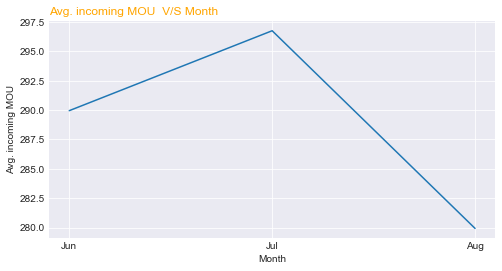

In [454]:
#Plotting Avg. total monthly incoming MOU  (Minutes of Usage) vs AON (Age on network)
incoming_col = highvalue_users.filter(regex ='total_ic_mou').columns
plot_avgMonthlyCalls('single',highvalue_users,calltype='incoming',colList=incoming_col)


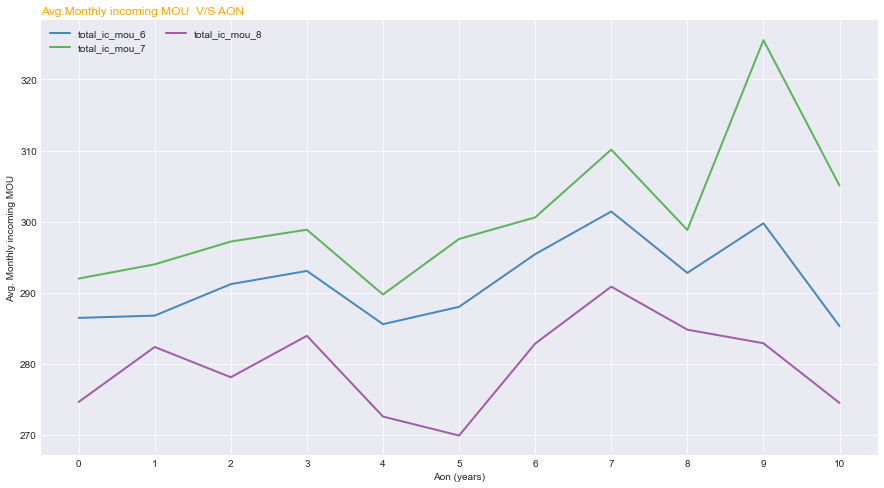

In [455]:
plot_avgMonthlyCalls('multi',highvalue_users,calltype='incoming',colList=incoming_col)

### Inferences
1. The monthly incoming calls is at its peak in July and then drops (Train)
2. The more the aon, the more is the incoming call (Test)

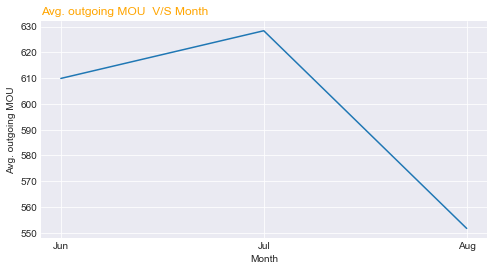

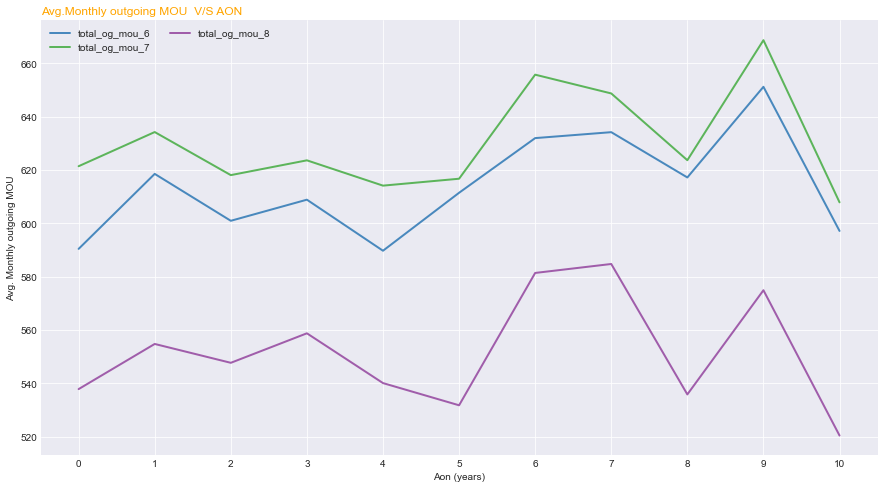

In [456]:
# Plotting Avg. total monthly outgoing MOU vs AON
outgoing_calls = highvalue_users.filter(regex ='total_og_mou').columns
plot_avgMonthlyCalls('single',highvalue_users,calltype='outgoing',colList=outgoing_calls)
plot_avgMonthlyCalls('multi',highvalue_users,calltype='outgoing',colList=outgoing_calls)

### Inferences
The August month has seen a sudden dip in Minutes of usage eventhough the minutes of usage for july has been higher than june

In [457]:
#Inspired from stackoverflow
def plot_byChurnMou(colList,calltype):
    fig, ax = plt.subplots(figsize=(7,4))
    plt.plot(highvalue_users.groupby(['churn_probability'])[colList].mean().T)
    ax.set_xticklabels(['Jun','Jul','Aug'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel("Avg. "+calltype+" MOU")

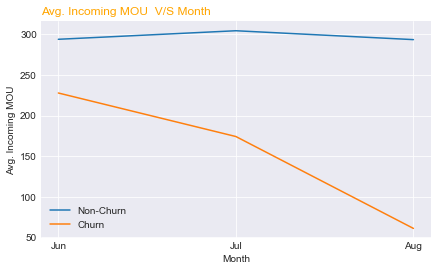

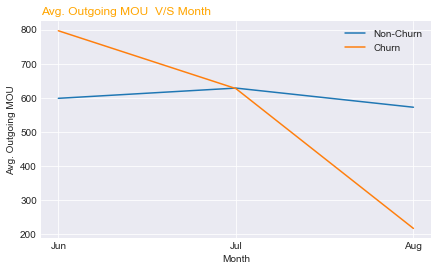

In [458]:
ic_col = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
og_col = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']
plot_byChurnMou(ic_col,'Incoming')
plot_byChurnMou(og_col,'Outgoing')

### Inferences
The number of incoming as well as outgoing calls goes down drastically after JUly

In [459]:
#Avg. Outgoing MOU per month churn vs Non-Churn
highvalue_users.groupby(['churn_probability'])['total_og_mou_6','total_og_mou_7','total_og_mou_8'].mean()

,total_og_mou_6,total_og_mou_7,total_og_mou_8
churn_probability,,,
0.0,598.399472,628.449292,572.238846
1.0,796.678922,627.009862,216.722092


In [460]:
#Avg. Incoming MOU per month churn vs Non-Churn
highvalue_users.groupby(['churn_probability'])['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].mean()

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
churn_probability,,,
0.0,293.771809,304.283177,293.355786
1.0,227.695026,174.142991,61.079660


In [461]:
def plot_byChurn(data,col):
    # per month churn vs Non-Churn
    fig, ax = plt.subplots(figsize=(7,4))
    colList=list(data.filter(regex=(col)).columns)
    colList = colList[:3]
    plt.plot(highvalue_users.groupby('churn_probability')[colList].mean().T)
    ax.set_xticklabels(['Jun','Jul','Aug'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title( str(col) +" V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()
    # Numeric stats for per month churn vs Non-Churn
    return highvalue_users.groupby('churn_probability')[colList].mean()

In [462]:
#Creating new feature: og_to_ic_mou_6, og_to_ic_mou_7, og_to_ic_mou_8
# adding 1 to denominator to avoid dividing by 0 and getting nan values.
for i in range(6,9):
    highvalue_users['og_to_ic_mou_'+str(i)] = (highvalue_users['total_og_mou_'+str(i)])/(highvalue_users['total_ic_mou_'+str(i)]+1)

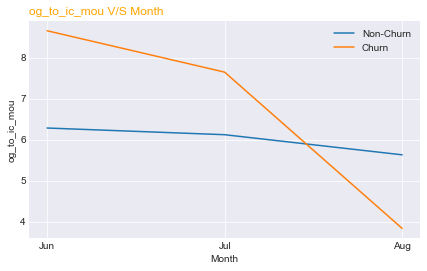

,og_to_ic_mou_6,og_to_ic_mou_7,og_to_ic_mou_8
churn_probability,,,
0.0,6.281686,6.118478,5.627880
1.0,8.654156,7.644676,3.832892


In [463]:
plot_byChurn(highvalue_users,'og_to_ic_mou')

People whose outgoing to incoming ratio is lower are most likely to churn

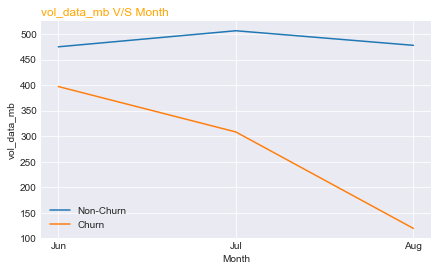

,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8
churn_probability,,,
0.0,475.025437,506.499116,477.910882
1.0,397.205187,308.198847,119.234006


In [464]:
plot_byChurn(highvalue_users,'vol_data_mb')

People who use more data do not churn

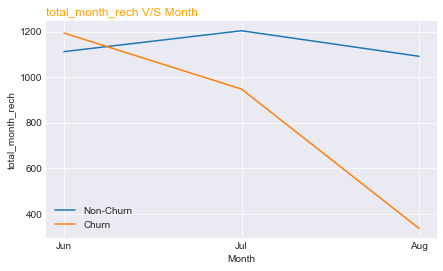

,total_month_rech_6,total_month_rech_7,total_month_rech_8
churn_probability,,,
0.0,1111.779143,1203.540406,1091.32647
1.0,1193.574928,947.474392,335.54211


In [465]:
plot_byChurn(highvalue_users,'total_month_rech')

People who are going to churn are most likely that their recharge amount is low

### Modeling

In [466]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [467]:
#Inspired from stackoverflow
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [468]:
def getModelMetrics(actual_churn=False,pred_churn=False):

    confusion = metrics.confusion_matrix(actual_churn, pred_churn)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # Calculate false postive rate - predicting churn when customer does not have churned
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # positive predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    # sklearn precision score value 
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))

In [469]:
#Train
# creating copy of the final hv_user dataframe
highvalue_users_PCA = highvalue_users.copy()
# removing the columns not required for modeling
highvalue_users_PCA.drop(['id', 'aon_bin'], axis=1, inplace=True)

In [470]:
#Train
# removing the datatime columns before PCA in train
dateTimeCols = list(highvalue_users_PCA.select_dtypes(include=['datetime64']).columns)
print(dateTimeCols)
highvalue_users_PCA.drop(dateTimeCols, axis=1, inplace=True)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [471]:
#train
#removing nan which is getting created
highvalue_users_PCA = highvalue_users_PCA[~np.any(np.isnan(highvalue_users_PCA), axis=1)]

### After pre-processing the Test and Train, now we will concatenate it 

In [472]:
print(len(train), len(test), len(df))

69999 30000 99999


In [473]:
df.head()

,id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn_probability,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,arpu_data_6,arpu_data_7,arpu_data_8,avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8
0,0,2014-06-30,2014-07-31,2014-08-31,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,2014-06-22,2014-07-10,2014-08-24,65,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1958,0.0,0.0,0.0,0.0,0,0,0,0,0,0,26.67,33.50,6.00,0,0,0,0.0,0.0,0.0,77.0,65.0,10.0
1,1,2014-06-30,2014-07-31,2014-08-31,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,2014-06-12,2014-07-10,2014-08-26,0,0,0,0.0,1.0,0

In [474]:
df.info(all, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 177 columns):
 #    Column                 Non-Null Count  Dtype         
---   ------                 --------------  -----         
 0    id                     99999 non-null  int64         
 1    last_date_of_month_6   99999 non-null  datetime64[ns]
 2    last_date_of_month_7   99398 non-null  datetime64[ns]
 3    last_date_of_month_8   99999 non-null  datetime64[ns]
 4    arpu_6                 99999 non-null  float64       
 5    arpu_7                 99999 non-null  float64       
 6    arpu_8                 99999 non-null  float64       
 7    onnet_mou_6            99999 non-null  float64       
 8    onnet_mou_7            99999 non-null  float64       
 9    onnet_mou_8            99999 non-null  float64       
 10   offnet_mou_6           99999 non-null  float64       
 11   offnet_mou_7           99999 non-null  float64       
 12   offnet_mou_8           99999 non-null  float

In [475]:
df = df.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], axis=1)

In [476]:
df.info(all, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 171 columns):
 #    Column                 Non-Null Count  Dtype  
---   ------                 --------------  -----  
 0    id                     99999 non-null  int64  
 1    arpu_6                 99999 non-null  float64
 2    arpu_7                 99999 non-null  float64
 3    arpu_8                 99999 non-null  float64
 4    onnet_mou_6            99999 non-null  float64
 5    onnet_mou_7            99999 non-null  float64
 6    onnet_mou_8            99999 non-null  float64
 7    offnet_mou_6           99999 non-null  float64
 8    offnet_mou_7           99999 non-null  float64
 9    offnet_mou_8           99999 non-null  float64
 10   roam_ic_mou_6          99999 non-null  float64
 11   roam_ic_mou_7          99999 non-null  float64
 12   roam_ic_mou_8          99999 non-null  float64
 13   roam_og_mou_6          99999 non-null  float64
 14   roam_og_mou_7          99999 non-nul

In [477]:
df['avg_rech_amt_6'] = df['avg_rech_amt_6'].fillna(0)
df['avg_rech_amt_7'] = df['avg_rech_amt_7'].fillna(0)
df['avg_rech_amt_8'] = df['avg_rech_amt_8'].fillna(0)


In [478]:
df.info(all,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 171 columns):
 #    Column                 Non-Null Count  Dtype  
---   ------                 --------------  -----  
 0    id                     99999 non-null  int64  
 1    arpu_6                 99999 non-null  float64
 2    arpu_7                 99999 non-null  float64
 3    arpu_8                 99999 non-null  float64
 4    onnet_mou_6            99999 non-null  float64
 5    onnet_mou_7            99999 non-null  float64
 6    onnet_mou_8            99999 non-null  float64
 7    offnet_mou_6           99999 non-null  float64
 8    offnet_mou_7           99999 non-null  float64
 9    offnet_mou_8           99999 non-null  float64
 10   roam_ic_mou_6          99999 non-null  float64
 11   roam_ic_mou_7          99999 non-null  float64
 12   roam_ic_mou_8          99999 non-null  float64
 13   roam_og_mou_6          99999 non-null  float64
 14   roam_og_mou_7          99999 non-nul

In [479]:
#dataset contains no null values

In [480]:
df.shape

(99999, 171)

In [481]:
#input split
df_train = df.iloc[:train_len,:] # training data
df_test = df.iloc[train_len:,:] # test data

In [482]:
train_len

69999

In [483]:
df_train.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn_probability,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,arpu_data_6,arpu_data_7,arpu_data_8,avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1958,0.0,0.0,0.0,0.0,0,0,0,0,0,0,26.67,33.50,6.00,0,0,0,0.0,0.0,0.0,77.0,65.0,10.0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,0.0,122.07,0.0,0.0,122.08,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,1.0,0.0,710,0.0,0.0,0.0,0.0,0,356,0,0,244,0,1.00,37.25,11.00,0,1,0,0.0,145.0,0.0,0.0,290.0,50.0
2,2,6

In [484]:
df_train.shape

(69999, 171)

In [485]:
df_test.shape

(30000, 171)

In [487]:
from sklearn.model_selection import train_test_split

#putting features variables in X
X_train = df_train.drop(['churn_probability'], axis=1)
X_test = df_test.drop(['churn_probability'], axis=1)


#putting response variables in Y
y_train = df_train['churn_probability']
y_test = df_test['churn_probability']

X = df_train.drop(['churn_probability'], axis=1)

y = df_train['churn_probability']

# Splitting the data into train and test
X_train_total, X_val, y_train_total, y_val = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [488]:
y_test.shape

(30000,)

In [489]:
y_test

69999    0.0
70000    0.0
70001    0.0
70002    0.0
70003    0.0
        ... 
99994    0.0
99995    0.0
99996    0.0
99997    0.0
99998    0.0
Name: churn_probability, Length: 30000, dtype: float64

In [492]:
#Rescaling the features before PCA as it is sensitive to the scales of the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [493]:
# fitting and transforming the scaler on train
X_train = scaler.fit_transform(X_train)
X_train_total = scaler.fit_transform(X_train_total)
# transforming the train using the already fit scaler
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [494]:
print("counts of label '1', before oversampling : {}".format(sum(y_train==1)))
print("counts of label '0', before oversampling: {} \n".format(sum(y_train==0)))
print("churn even rate(befor oversampling) : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

counts of label '1', before oversampling : 7132
counts of label '0', before oversampling: 62867 

churn even rate(befor oversampling) : 10.19% 



In [496]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [497]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))

After OverSampling, the shape of train_X: (125734, 170)
After OverSampling, the shape of train_y: (125734,) 

After OverSampling, counts of label '1': 62867
After OverSampling, counts of label '0': 62867
After OverSampling, churn event rate : 50.0% 



In [498]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [499]:
#Doing the PCA on the train data
pca_train = pca.fit(X_train_res)


In [500]:
#Let us do a scree plot
pca_train.explained_variance_ratio_[:50]

array([4.80279712e-01, 1.19347954e-01, 1.12747469e-01, 8.24841136e-02,
       6.43791418e-02, 2.41446707e-02, 1.33912786e-02, 1.07546421e-02,
       8.81435296e-03, 8.22529163e-03, 6.05464719e-03, 5.79390458e-03,
       5.31926375e-03, 4.99038250e-03, 3.73930619e-03, 3.24828193e-03,
       3.03039105e-03, 2.48370212e-03, 2.32803858e-03, 2.07996929e-03,
       2.02903695e-03, 1.80002690e-03, 1.62800885e-03, 1.59969019e-03,
       1.56139879e-03, 1.48527184e-03, 1.36938275e-03, 1.30575187e-03,
       1.25403779e-03, 1.21751739e-03, 1.03942299e-03, 9.95650811e-04,
       9.41439792e-04, 8.58575281e-04, 8.47953692e-04, 7.44419514e-04,
       7.25026354e-04, 6.93647379e-04, 6.50948821e-04, 6.34020875e-04,
       5.76696295e-04, 5.72529393e-04, 5.37681903e-04, 4.94587240e-04,
       4.61118301e-04, 4.53209393e-04, 4.10357258e-04, 3.88315257e-04,
       3.87225159e-04, 3.79760053e-04])

In [503]:
var_cumu = np.cumsum(pca_train.explained_variance_ratio_)

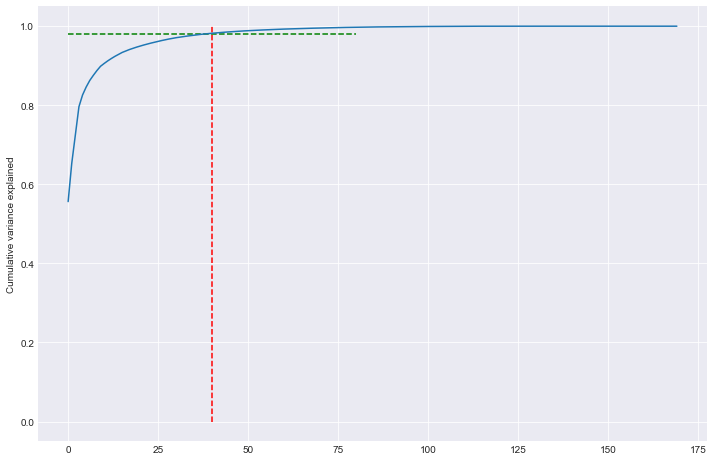

In [505]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=40, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.98, xmax=80, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [506]:
#Using incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=40)

In [507]:
#PCA on train
X_train_pca = pca_final.fit_transform(X_train_res)
X_train_pca.shape


(125734, 40)

In [508]:
#PCA on test
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(30000, 40)

In [509]:
#PCA on val
X_val_pca = pca_final.transform(X_val)
X_val_pca.shape

(21000, 40)

In [510]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.020365035774806806 , min corr:  -0.010929165021275456


In [511]:
#creating correlation matrix for the principal components
corrmat_test = np.corrcoef(X_test_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag_test = corrmat_test - np.diagflat(corrmat_test.diagonal())
print("max corr:",corrmat_nodiag_test.max(), ", min corr: ", corrmat_nodiag_test.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.20527923138455834 , min corr:  -0.2909304507990971


<AxesSubplot:>

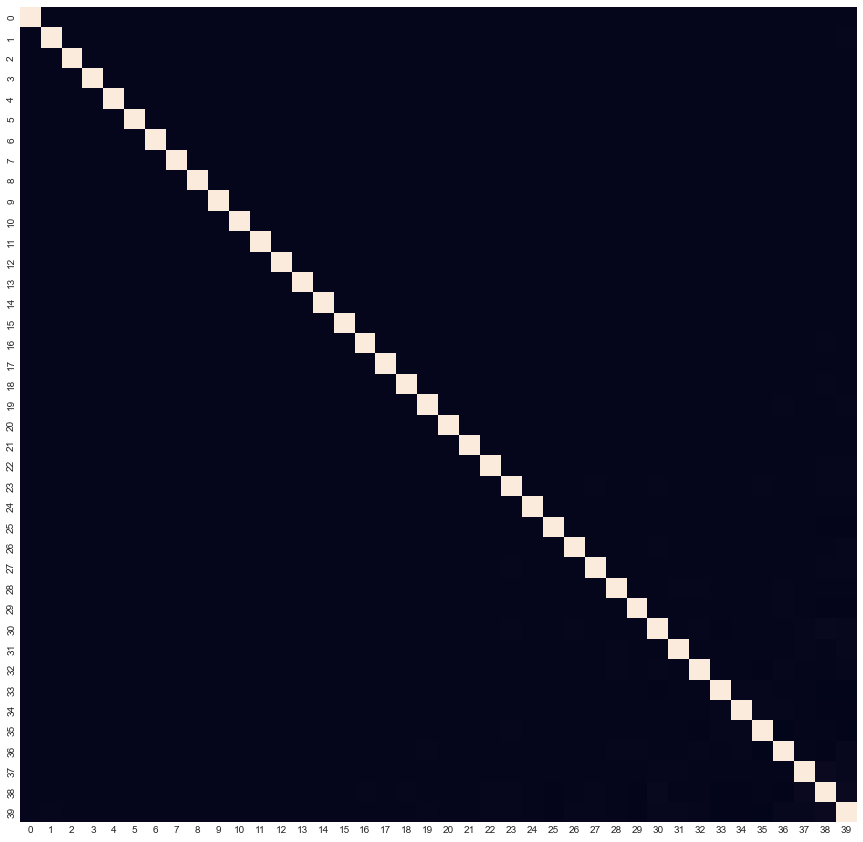

In [512]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, cbar=False)

<AxesSubplot:>

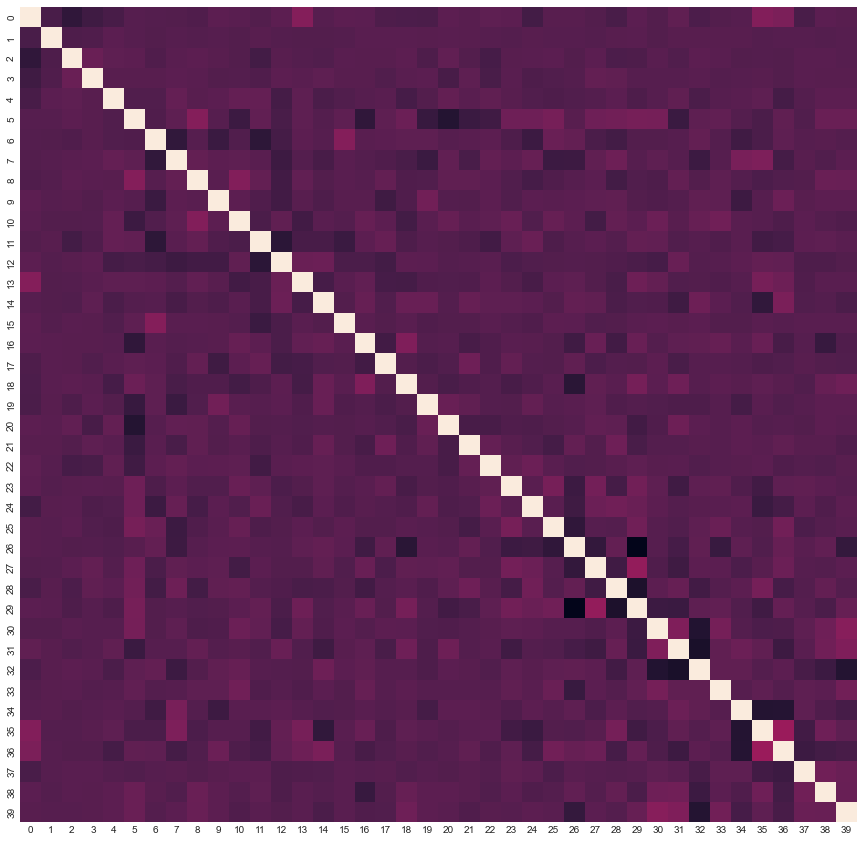

In [513]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat_test, cbar=False)

Correlations are close to zero which is what is needed

## Logistic Regression 

In [514]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm

lr0 = LogisticRegression(class_weight='balanced')

In [515]:
def modelfit(alg, X_train, y_train, performCV=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

In [516]:
def predictChurnWithProb(model,X,y,prob):
    # Funtion to predict the churn using the input probability cut-off
    # Input arguments: model instance, x and y to predict using model and cut-off probability
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    getModelMetrics(y_df.churn,y_df.final_predicted)
    return y_df

In [517]:
modelfit(lr0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.8154
Recall/Sensitivity : 0.8541
AUC Score (Train): 0.888402
CV Score : Mean - 0.8572746 | Std - 0.03138894 | Min - 0.8190609 | Max - 0.8893505


In [518]:
#Making prediction on the train data
pred_probs_train = lr0.predict_proba(X_train_pca)[:,1]
print("roc_auc_score(Train) {:2.2}".format(metrics.roc_auc_score(y_train_res, pred_probs_train)))

roc_auc_score(Train) 0.89


In [519]:
# predictions on Val data
pred_probs_val = lr0.predict(X_val_pca)
getModelMetrics(y_val,pred_probs_val)

Roc_auc_score : 0.8063912995773294
Sensitivity/Recall : 0.8203906622201048
Specificity: 0.7923919369345537
False Positive Rate: 0.20760806306544627
Positive predictive value: 0.30499468650371947
Negative Predictive value: 0.9754461378142504
sklearn precision score value: 0.30499468650371947


In [520]:
print("Accuracy : {}".format(metrics.accuracy_score(y_val,pred_probs_val)))
print("Recall : {}".format(metrics.recall_score(y_val,pred_probs_val)))
print("Precision : {}".format(metrics.precision_score(y_val,pred_probs_val)))

Accuracy : 0.7951904761904762
Recall : 0.8203906622201048
Precision : 0.30499468650371947


In [521]:
cut_off_prob=0.5
y_train_df = predictChurnWithProb(lr0,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8154198546137084
Sensitivity/Recall : 0.8541365104108674
Specificity: 0.7767031988165493
False Positive Rate: 0.22329680118345077
Positive predictive value: 0.79275116261903
Negative Predictive value: 0.8418938257556164
sklearn precision score value: 0.79275116261903


,churn,churn_Prob,final_predicted
0,0.0,0.676608,1
1,0.0,0.616962,1
2,0.0,0.765398,1
3,0.0,0.547319,1
4,0.0,0.340220,0


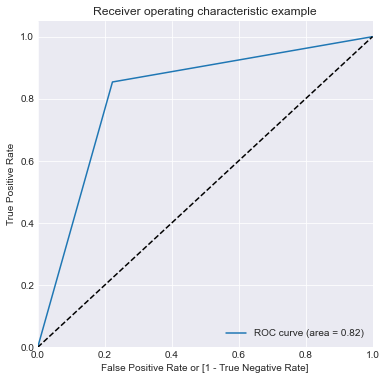

(array([0.       , 0.2232968, 1.       ]),
 array([0.        , 0.85413651, 1.        ]),
 array([2, 1, 0]))

In [522]:
draw_roc(y_train_df.churn, y_train_df.final_predicted)

In [542]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.churn, y_train_df.final_predicted)))

roc_auc_score : 0.82


In [543]:
def findOptimalCutoff(df):
    #Function to find the optimal cutoff for classifing as churn/non-churn
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)
    #print(df.head())
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.649506  0.975504  0.323508
0.2   0.2  0.709721  0.954603  0.464838
0.3   0.3  0.754991  0.927864  0.582118
0.4   0.4  0.790510  0.895637  0.685383
0.5   0.5  0.815420  0.854137  0.776703
0.6   0.6  0.821997  0.787997  0.855998
0.7   0.7  0.800849  0.682918  0.918781
0.8   0.8  0.710381  0.457553  0.963208
0.9   0.9  0.544865  0.098780  0.990949


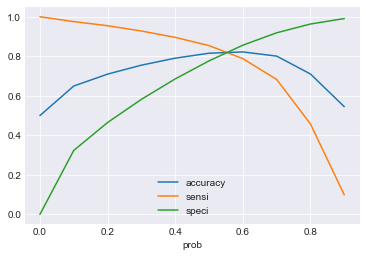

In [544]:
# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
findOptimalCutoff(y_train_df)

In [545]:
cut_off_prob=0.5
y_train_df = predictChurnWithProb(lr0,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8154198546137084
Sensitivity/Recall : 0.8541365104108674
Specificity: 0.7767031988165493
False Positive Rate: 0.22329680118345077
Positive predictive value: 0.79275116261903
Negative Predictive value: 0.8418938257556164
sklearn precision score value: 0.79275116261903


,churn,churn_Prob,final_predicted
0,0.0,0.676608,1
1,0.0,0.616962,1
2,0.0,0.765398,1
3,0.0,0.547319,1
4,0.0,0.340220,0


In [546]:
# predicting with the choosen cut-off on Validation
predictChurnWithProb(lr0,X_val_pca,y_val,cut_off_prob)

Roc_auc_score : 0.8063912995773294
Sensitivity/Recall : 0.8203906622201048
Specificity: 0.7923919369345537
False Positive Rate: 0.20760806306544627
Positive predictive value: 0.30499468650371947
Negative Predictive value: 0.9754461378142504
sklearn precision score value: 0.30499468650371947


,churn,churn_Prob,final_predicted
3425,1.0,0.961697,1
33067,1.0,0.954494,1
52420,0.0,0.830844,1
5220,0.0,0.343423,0
33958,1.0,0.662495,1
...,...,...,...
6664,0.0,0.583948,1
60333,0.0,0.120143,0
26916,0.0,0.076824,0
31350,0.0,0.017728,0


The resulting model, after PCA and logistic regression (with optimal cutoff setting) has a right balance of different metrics score for sensitivity, specificity and Roc Accuracy on the train and test set.
- **train sensitivity  :** 84.9%, **train roc auc score  :** 82.9%
- **Validation sensitivity   :** 80.3%, **Validation roc auc score  :** 80.3%

### Prediction on the Real Time - Test data (LOGISTIC REGRESSION)

In [528]:
X_test_pca.shape

(30000, 40)

In [529]:
# predictions on Test data
y_pred = lr0.predict(X_test_pca)

In [530]:
y_pred.shape

(30000,)

In [531]:
# Predicted probabilities
y_pred_prob = lr0.predict_proba(X_test_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred_prob)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.566951
1,0.043060
2,0.418189
3,0.135588
4,0.294951


In [532]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn_probability
69999,0.0
70000,0.0
70001,0.0
70002,0.0
70003,0.0


In [533]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,69999,NaN,0.566951
1,70000,NaN,0.043060
2,70001,NaN,0.418189
3,70002,NaN,0.135588
4,70003,NaN,0.294951


In [534]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted
0,69999,NaN,0.566951,1
1,70000,NaN,0.043060,0
2,70001,NaN,0.418189,0
3,70002,NaN,0.135588,0
4,70003,NaN,0.294951,0


In [537]:
submission = pd.DataFrame()
submission['id'] = y_pred_final['CustID']
submission['churn_probability'] = y_pred_final['predicted']
submission.head(5)

,id,churn_probability
0,69999,1
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [541]:
submission.shape

(30000, 2)

In [540]:
submission.to_csv('my_submission.csv', index=False)

The sensitivity is 80% on test and 84% on train

In [547]:
dt0 = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=10)
modelfit(dt0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.7584
Recall/Sensitivity : 0.7933
AUC Score (Train): 0.823264
CV Score : Mean - 0.5491509 | Std - 0.3228322 | Min - 0.1430529 | Max - 0.8205814


In [548]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(100, 400, 50),
    'min_samples_split': range(100, 400, 100),
    'max_features': [8,10,15]
}
# Create a based model
dt = DecisionTreeClassifier(class_weight='balanced',random_state=10)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1,scoring="f1_weighted")

In [549]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=10),
             n_jobs=4,
             param_grid={'max_depth': range(5, 15, 3),
                         'max_features': [8, 10, 15],
                         'min_samples_leaf': range(100, 400, 50),
                         'min_samples_split': range(100, 400, 100)},
             scoring='f1_weighted', verbose=1)

In [550]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [551]:
# printing the optimal accuracy score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.46137200680435475 using {'max_depth': 8, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 100}


In [552]:
# model with the best hyperparameters
dt_final = DecisionTreeClassifier(class_weight='balanced',
                             max_depth=14,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=15,
                             random_state=10)

In [553]:
modelfit(dt_final,X_train_pca,y_train_res)


Model Report
Accuracy : 0.8316
Recall/Sensitivity : 0.8382
AUC Score (Train): 0.915622
CV Score : Mean - 0.5806433 | Std - 0.3250718 | Min - 0.1606769 | Max - 0.8578505


In [554]:
# make predictions on Validatoin DATA
pred_probs_val_DT = dt_final.predict(X_val_pca)
#Let's check the model metrices.
getModelMetrics(actual_churn=y_val,pred_churn=pred_probs_val_DT)

Roc_auc_score : 0.8006930572954302
Sensitivity/Recall : 0.7798951881848499
Specificity: 0.8214909264060103
False Positive Rate: 0.17850907359398974
Positive predictive value: 0.3266813011374975
Negative Predictive value: 0.9711051347801614
sklearn precision score value: 0.3266813011374975


In [555]:
# classification report
print(classification_report(y_val,pred_probs_val_DT))

              precision    recall  f1-score   support

         0.0       0.97      0.82      0.89     18901
         1.0       0.33      0.78      0.46      2099

    accuracy                           0.82     21000
   macro avg       0.65      0.80      0.68     21000
weighted avg       0.91      0.82      0.85     21000



The recall rate is 54%. Seems it requries hyper parameter tuning

In [556]:
# predicting churn with default cut-off 0.5
cut_off_prob = 0.5
y_train_df = predictChurnWithProb(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8316445830085736
Sensitivity/Recall : 0.8382458205417787
Specificity: 0.8250433454753686
False Positive Rate: 0.17495665452463136
Positive predictive value: 0.8273231078386737
Negative Predictive value: 0.8360816931831004
sklearn precision score value: 0.8273231078386737


,churn,churn_Prob,final_predicted
0,0.0,0.072289,0
1,0.0,0.552632,1
2,0.0,0.034783,0
3,0.0,0.102190,0
4,0.0,0.343874,0


     prob  accuracy     sensi     speci
0.0   0.0  0.600776  1.000000  0.201552
0.1   0.1  0.712759  0.988706  0.436811
0.2   0.2  0.786231  0.957291  0.615172
0.3   0.3  0.810282  0.933463  0.687101
0.4   0.4  0.825672  0.897609  0.753734
0.5   0.5  0.831645  0.838246  0.825043
0.6   0.6  0.826777  0.783607  0.869948
0.7   0.7  0.805963  0.691842  0.920085
0.8   0.8  0.772917  0.593586  0.952248
0.9   0.9  0.703660  0.427903  0.979417


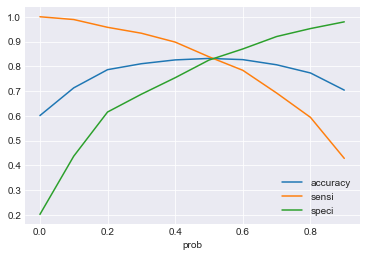

In [557]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

In [558]:
# predicting churn with cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8316445830085736
Sensitivity/Recall : 0.8382458205417787
Specificity: 0.8250433454753686
False Positive Rate: 0.17495665452463136
Positive predictive value: 0.8273231078386737
Negative Predictive value: 0.8360816931831004
sklearn precision score value: 0.8273231078386737


,churn,churn_Prob,final_predicted
0,0.0,0.072289,0
1,0.0,0.552632,1
2,0.0,0.034783,0
3,0.0,0.102190,0
4,0.0,0.343874,0


In [559]:
#Lets see how it performs on test data.
y_val_df= predictChurnWithProb(dt_final,X_val_pca,y_val,cut_off_prob)
y_val_df.head()

Roc_auc_score : 0.8006930572954302
Sensitivity/Recall : 0.7798951881848499
Specificity: 0.8214909264060103
False Positive Rate: 0.17850907359398974
Positive predictive value: 0.3266813011374975
Negative Predictive value: 0.9711051347801614
sklearn precision score value: 0.3266813011374975


,churn,churn_Prob,final_predicted
3425,1.0,0.884211,1
33067,1.0,0.669903,1
52420,0.0,0.943984,1
5220,0.0,0.193103,0
33958,1.0,0.477941,0


- Decision tree after selecting optimal cut-off also is resulting in a model with
<br>**Train Recall : 83.8%**  and  **Train Roc_auc_score : 83.1%**
<br>**Validation Recall : 77.9%**  and  **Validation Roc_auc_score : 80.0%**

### Random Forest

In [560]:
def plot_traintestAcc(score,param):
    scores = score
    # plotting accuracies with max_depth
    plt.figure()
    plt.plot(scores["param_"+param], 
    scores["mean_train_score"], 
    label="training accuracy")
    plt.plot(scores["param_"+param], 
    scores["mean_test_score"], 
    label="test accuracy")
    plt.xlabel(param)
    plt.ylabel("f1")
    plt.legend()
    plt.show()

In [561]:
#Let us try random forest
parameters = {'max_depth': range(10, 30, 5)}
rf0 = RandomForestClassifier()
rfgs = GridSearchCV(rf0, parameters, 
                    cv=5, 
                   scoring="f1")
rfgs.fit(X_train_pca,y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(10, 30, 5)}, scoring='f1')

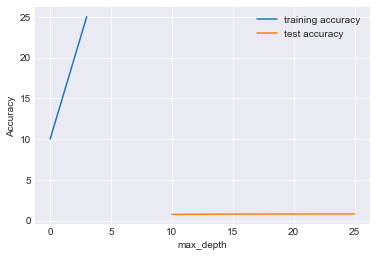

In [562]:
scores = rfgs.cv_results_
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [563]:
parameters = {'n_estimators': range(50, 150, 25)}
rf1 = RandomForestClassifier(max_depth=20,random_state=10)
rfgs = GridSearchCV(rf1, parameters, 
                    cv=3, 
                   scoring="recall")

In [564]:
rfgs.fit(X_train_pca,y_train_res)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=20, random_state=10),
             param_grid={'n_estimators': range(50, 150, 25)}, scoring='recall')

In [565]:
rf_final = RandomForestClassifier(max_depth=20,
                                  n_estimators=80,
                                  max_features=5,
                                  min_samples_leaf=100,
                                  min_samples_split=50,
                                  random_state=10)

In [566]:
print("Model performance on Train data:")
modelfit(rf_final,X_train_pca,y_train_res)

Model performance on Train data:

Model Report
Accuracy : 0.8595
Recall/Sensitivity : 0.85
AUC Score (Train): 0.934686
CV Score : Mean - 0.7923281 | Std - 0.1410199 | Min - 0.592745 | Max - 0.9126869


In [567]:
# predict on test data
predictions = rf_final.predict(X_val_pca)

In [568]:
print("Model performance on Test data:")
getModelMetrics(y_val,predictions)

Model performance on Test data:
Roc_auc_score : 0.8317283287390059
Sensitivity/Recall : 0.7994282991900905
Specificity: 0.8640283582879212
False Positive Rate: 0.13597164171207873
Positive predictive value: 0.3950094161958569
Negative Predictive value: 0.9748686723973257
sklearn precision score value: 0.3950094161958569


The model performance on the validation data is 79.9%

## Boosting

In [569]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
# Fitting the default GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=10)
modelfit(gb, X_train_pca, y_train_res)


Model Report
Accuracy : 0.8404
Recall/Sensitivity : 0.8461
AUC Score (Train): 0.912510
CV Score : Mean - 0.5555976 | Std - 0.1854236 | Min - 0.3276802 | Max - 0.7266854


In [570]:
gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 10,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [571]:
# Hyperparameter tuning for n_estimators
param_test1 = {'n_estimators':range(20,150,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='f1',n_jobs=4, cv=3)
gsearch1.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4, param_grid={'n_estimators': range(20, 150, 10)},
             scoring='f1')

In [572]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 20}, 0.6510686343189972)

In [575]:
# Hyperparameter tuning for min_sample_leaf
param_test2 = {'min_samples_leaf':range(30,71,10)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_depth=15,min_samples_split=200, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='f1',n_jobs=4, cv=3)
gsearch2.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=15,
                                                  max_features='sqrt',
                                                  min_samples_split=200,
                                                  n_estimators=140,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4, param_grid={'min_samples_leaf': range(30, 71, 10)},
             scoring='f1')

In [576]:
gsearch2.best_params_, gsearch2.best_score_

({'min_samples_leaf': 30}, 0.6632547682129161)

In [577]:
# Hyperparameter tuning for max_features
param_test3 = {'max_features':range(7,20,2)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_depth=15, min_samples_split=200, min_samples_leaf=30, subsample=0.8, random_state=10),
param_grid = param_test3, scoring='f1',n_jobs=4, cv=3)
gsearch3.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=15,
                                                  min_samples_leaf=30,
                                                  min_samples_split=200,
                                                  n_estimators=140,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4, param_grid={'max_features': range(7, 20, 2)},
             scoring='f1')

In [578]:
gsearch3.best_params_, gsearch3.best_score_

({'max_features': 7}, 0.6619033681186667)

Tuning is done ,lets try running the Gradient boost classifier now

In [580]:
# Tunned GradientBoostingClassifier
gb_final = GradientBoostingClassifier(learning_rate=0.1, n_estimators=20,max_features=7,max_depth=15, min_samples_split=200, min_samples_leaf=30, subsample=0.8, random_state=10)
modelfit(gb_final, X_train_pca, y_train_res)


Model Report
Accuracy : 0.9099
Recall/Sensitivity : 0.9168
AUC Score (Train): 0.969746
CV Score : Mean - 0.6927563 | Std - 0.2319798 | Min - 0.3988145 | Max - 0.9007506


In [581]:
# Fit the model to our train and target
gb.fit(X_train_pca, y_train_res)


GradientBoostingClassifier(random_state=10)

In [582]:
# Get our predictions
gb_predictions = gb.predict(X_val_pca)

In [583]:
gb_predictions

array([1., 1., 1., ..., 0., 0., 0.])

In [584]:
gb_predictions_prob = gb.predict_proba(X_val_pca)
gb_predictions_prob

array([[0.14277423, 0.85722577],
       [0.15278314, 0.84721686],
       [0.05578654, 0.94421346],
       ...,
       [0.90457757, 0.09542243],
       [0.97953863, 0.02046137],
       [0.92078699, 0.07921301]])

In [585]:
getModelMetrics(y_val,gb_predictions)

Roc_auc_score : 0.8242996487376781
Sensitivity/Recall : 0.8175321581705574
Specificity: 0.8310671393047987
False Positive Rate: 0.1689328606952013
Positive predictive value: 0.3495620289264616
Negative Predictive value: 0.9761978745882791
sklearn precision score value: 0.3495620289264616


Train recall = 91.6%
Validation recall = 81.7%

## XG Boost

In [593]:
pip install xgboost

     |████████████████████████████████| 1.7 MB 892 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [594]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [595]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgb_cfl.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [597]:
xgb1 = XGBClassifier(learning_rate =0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective= 'binary:logistic',
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27)

In [598]:
# Model fit and performance on Train data
modelfit(xgb1, X_train_pca, y_train_res)


Model Report
Accuracy : 0.9506
Recall/Sensitivity : 0.9663
AUC Score (Train): 0.988849
CV Score : Mean - 0.430227 | Std - 0.1526297 | Min - 0.2427138 | Max - 0.5767787


In [619]:
y_val_xg = xgb1.predict(X_val_pca)

In [620]:
xgb_predictions_prob = gb.predict_proba(X_val_pca)
xgb_predictions_prob

array([[0.14277423, 0.85722577],
       [0.15278314, 0.84721686],
       [0.05578654, 0.94421346],
       ...,
       [0.90457757, 0.09542243],
       [0.97953863, 0.02046137],
       [0.92078699, 0.07921301]])

In [621]:
getModelMetrics(y_val,gb_predictions)

Roc_auc_score : 0.8242996487376781
Sensitivity/Recall : 0.8175321581705574
Specificity: 0.8310671393047987
False Positive Rate: 0.1689328606952013
Positive predictive value: 0.3495620289264616
Negative Predictive value: 0.9761978745882791
sklearn precision score value: 0.3495620289264616


In [607]:
# predictions on Test data
y_pred_xg = xgb1.predict(X_test_pca)

In [608]:
# Predicted probabilities
y_pred_prob_xg = xgb1.predict_proba(X_test_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df_xg = pd.DataFrame(y_pred_prob_xg)
# Converting to column dataframe
y_pred_1_xg = y_pred_df_xg.iloc[:,[1]]
# Let's see the head
y_pred_1_xg.head()

,1
0,0.054587
1,0.000118
2,0.116980
3,0.000645
4,0.018519


In [609]:
# Converting y_test to dataframe
y_test_df_xg = pd.DataFrame(y_test)
y_test_df_xg.head()

,churn_probability
69999,0.0
70000,0.0
70001,0.0
70002,0.0
70003,0.0


In [610]:
# Putting CustID to index
y_test_df_xg['CustID'] = y_test_df_xg.index
# Removing index for both dataframes to append them side by side 
y_pred_1_xg.reset_index(drop=True, inplace=True)
y_test_df_xg.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final_xg = pd.concat([y_test_df_xg,y_pred_1_xg],axis=1)
# Renaming the column 
y_pred_final_xg= y_pred_final_xg.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final_xg = y_pred_final_xg.reindex(['CustID','Churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final_xg.head()

,CustID,Churn,Churn_Prob
0,69999,NaN,0.054587
1,70000,NaN,0.000118
2,70001,NaN,0.116980
3,70002,NaN,0.000645
4,70003,NaN,0.018519


In [615]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final_xg['predicted'] = y_pred_final_xg.Churn_Prob.map( lambda x: 1 if x > 0.2 else 0)
# Let's see the head
y_pred_final_xg.head()

,CustID,Churn,Churn_Prob,predicted
0,69999,NaN,0.054587,0
1,70000,NaN,0.000118,0
2,70001,NaN,0.116980,0
3,70002,NaN,0.000645,0
4,70003,NaN,0.018519,0


In [617]:
submission = pd.DataFrame()
submission['id'] = y_pred_final['CustID']
submission['churn_probability'] = y_pred_final['predicted']
submission.head(5)

,id,churn_probability
0,69999,1
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [618]:
submission.to_csv('Kishorepromod_pandimuneeswaran.csv', index=False)

### Recommendations
      1. Customer churn seems to be well predicted by drop in usage. Hence the company can identify likely to churn based on usage drop and provide personal support and throw away offers for the customers to not churn
      2. Keeping in touch with such customers on a regular basis to find out what are their expectations and what is the problem they are facing might help.
      3. Outgoing tariffs can be revisited based on churning to make sure if that is not one of the reasons for customer leaving
      4. Offering incentives and free data packs during the month their usage drops could provide more turn over and can bring back customers to actively use the services

XG Boost among the best model to give Train recall = 95% <br>
But validation recall is not improved than anyother models